- De las variables numéricas, halla datos estadísticos.

In [1]:
import pandas as pd
import numpy as np
from statistics import mode
from pandas.api.types import CategoricalDtype
df = pd.read_csv("housing_train.csv", low_memory=False)

In [4]:
# conteo de nulos para cada columna
dataNull=df.isnull().sum() 
print([dataNull[dataNull > 0]])

[LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64]


In [5]:
# Porcentaje de nulos
print([dataNull[dataNull > 0]/df.shape[0]])

[LotFrontage     0.177397
Alley           0.937671
MasVnrType      0.005479
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtFinType2    0.026027
Electrical      0.000685
FireplaceQu     0.472603
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
PoolQC          0.995205
Fence           0.807534
MiscFeature     0.963014
dtype: float64]


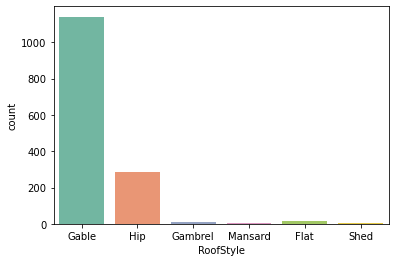

<AxesSubplot:xlabel='RoofStyle', ylabel='SalePrice'>

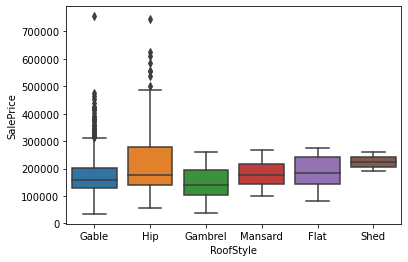

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x="RoofStyle", data=df, palette="Set2")
plt.show()
sns.boxplot(x=df["RoofStyle"], y=df["SalePrice"])

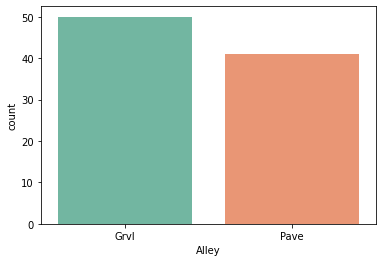

<AxesSubplot:xlabel='Alley', ylabel='SalePrice'>

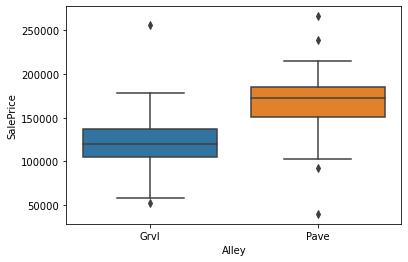

In [7]:
sns.countplot(x="Alley", data=df, palette="Set2")
plt.show()
sns.boxplot(x=df["Alley"], y=df["SalePrice"])

<AxesSubplot:xlabel='LotArea', ylabel='Density'>

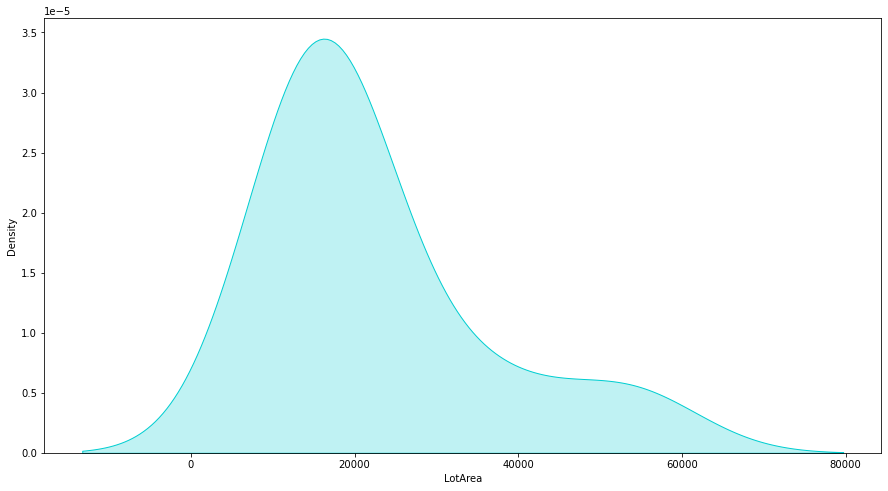

In [8]:
plt.figure(figsize=(15, 8))
sns.kdeplot(df["LotArea"][df.SalePrice>500000], color="darkturquoise", shade=True)

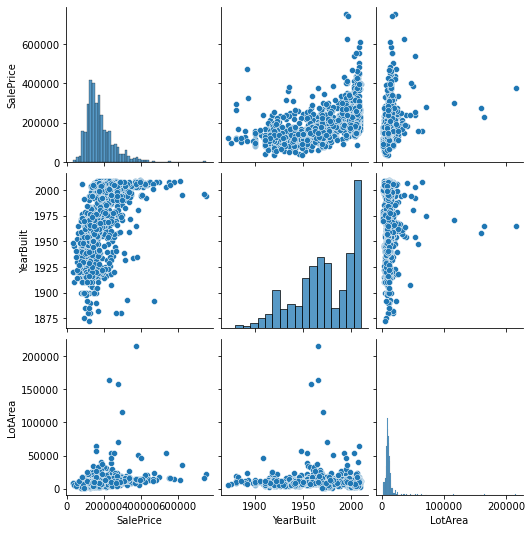

In [9]:
cols=["SalePrice", "YearBuilt", "LotArea"]
sns.pairplot(df[cols])

- De las variables categóricas, lista las diferentes categorías y halla la frecuencia de cada una de ellas. 

In [18]:
dfcat = df.select_dtypes(exclude=['int64', 'float64']) ## Excluye todos los valoes numericos
for col in dfcat.columns:
    print('-----\nCATEGORIA: ', col)
    print('FRECUENCIAS: ')
    print(dfcat[col].value_counts()) # para pintar el nombre de los elementos unicos de cada categoria
    #print(dfcat[col].value_counts().reset_index(name='freq')) # lo mismo que el anterior pero le pone index en lugar de nombre

-----
CATEGORIA:  MSZoning
FRECUENCIAS: 
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
-----
CATEGORIA:  Street
FRECUENCIAS: 
Pave    1454
Grvl       6
Name: Street, dtype: int64
-----
CATEGORIA:  Alley
FRECUENCIAS: 
Grvl    50
Pave    41
Name: Alley, dtype: int64
-----
CATEGORIA:  LotShape
FRECUENCIAS: 
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
-----
CATEGORIA:  LandContour
FRECUENCIAS: 
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
-----
CATEGORIA:  Utilities
FRECUENCIAS: 
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
-----
CATEGORIA:  LotConfig
FRECUENCIAS: 
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
-----
CATEGORIA:  LandSlope
FRECUENCIAS: 
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
-----
CATEGORIA:  Neighborhood
FRECUENCIAS: 
NAmes      225
CollgCr    1

- Crea matriz de correlaciones existentes entre las variables numéricas del conjunto de datos y analiza los resultados. 

- Tratamiento de missing. Si existen valores faltantes, decide si eliminar los registros o llenarlos con valores como la media, la mediana o la moda, y justifica tu respuesta. 

- Aplica árboles y random forest al problema de regresión.

- Compara, mediante las medidas que te parezcan adecuadas, la capacidad predictiva de ambos métodos.

- Comenta las ventajas y desventajas de cada modelo. De acuerdo con los resultados, ¿son realmente útiles los modelos creados para el conjunto de datos propuesto? 

- Para el ejercicio de clasificación, tanto para árboles como para random forest, se crean los siguientes grupos: grupo 1 (SalePrice menor o igual a 100 000), grupo 2 (SalePrice entre 100 001 y 500 000) y grupo 3 SalePrice (mayor o igual a 500 001).

- Compara los resultados de los dos clasificadores y comenta los resultados. 

- Otros comentarios que consideres adecuados.